# Assignemnt 3
## Jett R
## 4/21/24

In [1]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
graph = ox.load_graphml('C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 3/graph.graphml')

# Task 1

a) How many nodes and edges does this graph have?

b) Convert the graph to two GeoDataFrames, one containing edges and one containing the nodes

c) What is the coordinate reference system of the nodes GeoDataFrame?

d) List the column names in the edges GeoDataFrame.

e) What is the min, max, and mean edge length?

f) Produce and customize a plot showing the Oregon Highway Network using the ox.plot_graph function..


### a) How many nodes and edges does this graph have?

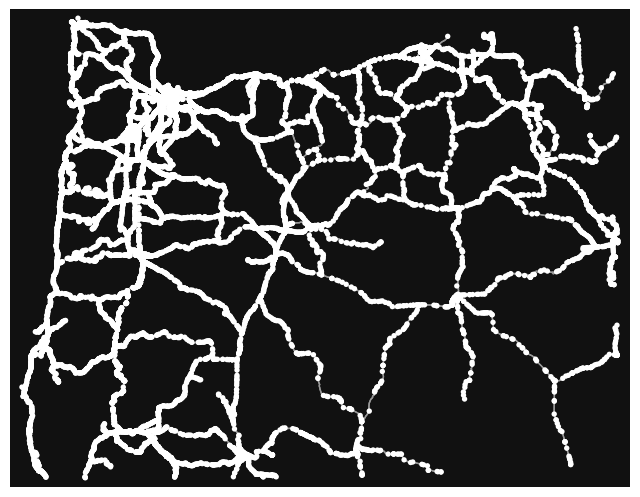

In [7]:
fig, ax = ox.plot_graph(graph)
plt.show()

In [8]:
NumberOfNodes = graph.number_of_nodes()
print("Number of nodes:", NumberOfNodes)

NumberOfEdges = graph.number_of_edges()
print("Number of Edges:", NumberOfEdges)

Number of nodes: 19793
Number of Edges: 42508


### b) Convert the graph to two GeoDataFrames, one containing edges and one containing the nodes 

### c) What is the coordinate reference system of the nodes GeoDataFrame?

In [59]:
# Converting the graph to GeoDataFrames
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph)


# To print the CRS of the dataframe
print("CRS of the nodes GeoDataFrame -", nodes_gdf.crs)

CRS of the nodes GeoDataFrame - epsg:32610


In [20]:
edges_gdf.head()

name       length  \
u v  key                                            
0 1  0    CABIN CREEK S.R.A. CONN #1   172.406720   
  96 0    CABIN CREEK S.R.A. CONN #1   199.893815   
     1    CABIN CREEK S.R.A. CONN #2   195.040370   
1 4  0                       PACIFIC  4982.726110   
  0  0    CABIN CREEK S.R.A. CONN #1   172.406720   

                                                   geometry  
u v  key                                                     
0 1  0    LINESTRING (474471.652 4813047.859, 474471.427...  
  96 0    LINESTRING (474434.459 4812856.736, 474459.957...  
     1    LINESTRING (474434.459 4812856.736, 474451.459...  
1 4  0    LINESTRING (474446.660 4813218.049, 474441.478...  
  0  0    LINESTRING (474471.652 4813047.859, 474471.427...

In [10]:
edges_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 42508 entries, (0, 1, 0) to (19792, 19791, 0)
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      42508 non-null  object  
 1   length    42508 non-null  float64 
 2   geometry  42508 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.5+ MB


In [18]:
nodes_gdf.head()

,nodeID,x,y,geometry
osmid,,,,
0,0,474471.651693,4.813048e+06,POINT (474471.652 4813047.859)
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)


In [11]:
nodes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 19793 entries, 0 to 19792
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   nodeID    19793 non-null  object  
 1   x         19793 non-null  float64 
 2   y         19793 non-null  float64 
 3   geometry  19793 non-null  geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 773.2+ KB


### d) List the column names in the edges GeoDataFrame.

In [12]:
# List the column names
column_names = edges_gdf.columns.tolist()
print("Column names in Edges GDF:", column_names)

Column names in Edges GDF: ['name', 'length', 'geometry']


### e) What is the min, max, and mean edge length?

In [13]:
# Pull out the Length Column
edge_lengths = edges_gdf['length']

# Find Min, Max, Mean of the length Column
min_length = edge_lengths.min()
max_length = edge_lengths.max()
mean_length = edge_lengths.mean()

print("Minimum edge length:", min_length)
print("Maximum edge length:", max_length)
print("Mean edge length:", mean_length)

Minimum edge length: 1.370217966253487
Maximum edge length: 21730.128883116628
Mean edge length: 674.3728080973483


### f) Produce and customize a plot showing the Oregon Highway Network using the ox.plot_graph function..

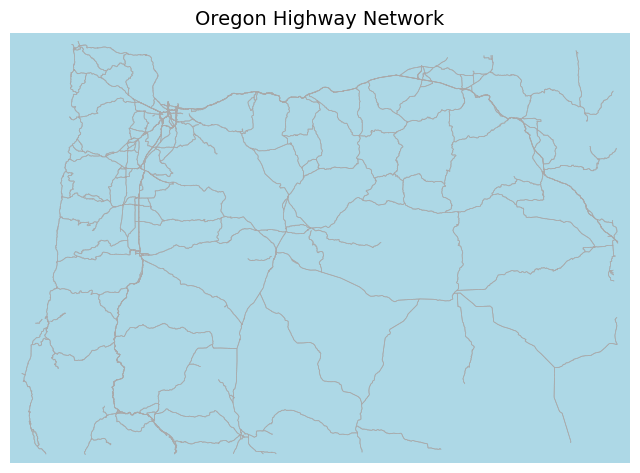

In [10]:
# Plot the graph. Graph Variable from beginning, Don't show the Nodes
fig, ax = ox.plot_graph(graph, bgcolor='white', edge_color='darkgrey', edge_linewidth=0.5, node_size=0, show=False)
plt.title("Oregon Highway Network", fontsize=14)
ax.set_facecolor('lightblue')
ax.set_aspect(0.90)
plt.show()

# Task 2
### Read the oregon_cities.shp using GeoPandas.

a) Reproject the city GeoDataFrame to UTM Zone 10 N.

b) Choose four cities in Oregon (the more spread out the better!) and compute the Euclidean distance (in km) between each pair.

c) List the nearest node for each of the four cities.

d) What is the shortest path length (i.e. nx.shortest_path_length) between three pairs of cities (in km)?

e) Produce and customize a plot showing the routes between your three city pairs (i.e. fig, ax = ox.plot_graph_route(graph, r
f) On average, how much longer is the network distances compared to the equivalent Euclidean distances?

g) How long would it take to travel between your three city pairs given an average speed of 60 mph?

oute)).


In [53]:
Oregon_Cities_shp = gpd.read_file('C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Assignment 3/oregon_cities/oregon_cities.shp')

## a) Reproject the city GeoDataFrame to UTM Zone 10 N.

In [54]:
Oregon_Cities_UTM = Oregon_Cities_shp.to_crs(epsg=32610)

In [13]:
Oregon_Cities_UTM.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   City      377 non-null    object  
 1   lat       377 non-null    float64 
 2   lon       377 non-null    float64 
 3   geometry  377 non-null    geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 11.9+ KB


## b) Choose four cities in Oregon (the more spread out the better!) and compute the Euclidean distance (in km) between each pair.

In [14]:
# I want to look at Portland, Ashland, Florence, Ontario. Let's find info about them

cities_to_find = ['Portland', 'Ashland', 'Florence', 'Ontario']
selected_cities = Oregon_Cities_UTM.query('City in @cities_to_find')
selected_cities_info = selected_cities[['City', 'lat', 'lon', 'geometry']]

print(selected_cities_info)

         City    lat     lon                        geometry
12    Ashland  42.19 -122.70  POINT (524771.251 4670915.611)
104  Florence  43.99 -124.11  POINT (410991.585 4871361.019)
247   Ontario  44.03 -116.98  POINT (982435.074 4892853.383)
262  Portland  45.54 -122.65  POINT (527325.009 5042999.972)


In [21]:
import numpy as np
# city_coords_array is a (4,2) , 4 rows , 1 for each city , and 2 columns, where first column is Latitude and second column is Longitude. the city
# name remains the KEY for each row of coords.
# np.lingalg.norm calculates the euclidean distance along a specified axis. In this case we specify the Latitude and Longitude as the last axis, -1
# we slice each array so have array shapes that are compatible for piecewise operation. (4,2) becomes (4,1,2) then the other (4,2) becomes (1,4,2)
# (rows, cols , depth). 

# Coordinates of the selected cities. The City name is a KEY and the Coordinates are their VALUE
city_coordinates = {
    'Portland': (45.54, -122.65),
    'Ashland': (42.19, -122.70),
    'Florence': (43.99, -124.11),
    'Ontario': (44.03, -116.98)
}

# Convert coords to NumPy arrays
city_coords_array = np.array(list(city_coordinates.values())) 

# Calculate pairwise Euclidean distances
distances = np.linalg.norm(city_coords_array[:, np.newaxis, :] - city_coords_array[np.newaxis, :, :], axis=-1)

# Print the distances
print("Euclidean distances between each pair of cities:")
for i, city1 in enumerate(city_coordinates.keys()): # i is the index, city1 is the key(city name) for that index from the city_coordinates.keys()
    for j, city2 in enumerate(city_coordinates.keys()): # a second time for the second city
        if i < j:
            distance = distances[i, j]
            print(f"{city1} - {city2}: {distance:.2f} km")


Euclidean distances between each pair of cities:
Portland - Ashland: 3.35 km
Portland - Florence: 2.13 km
Portland - Ontario: 5.87 km
Ashland - Florence: 2.29 km
Ashland - Ontario: 6.01 km
Florence - Ontario: 7.13 km


## c) List the nearest node for each of the four cities.

In [14]:
# List the column names
column_names = nodes_gdf.columns.tolist()
print("Column names in Nodes GDF:", column_names)

Column names in Nodes GDF: ['nodeID', 'x', 'y', 'geometry']


In [16]:
nodes_gdf.head()

,nodeID,x,y,geometry
osmid,,,,
0,0,474471.651693,4.813048e+06,POINT (474471.652 4813047.859)
1,1,474446.659714,4.813218e+06,POINT (474446.660 4813218.049)
4,4,474465.724070,4.817570e+06,POINT (474465.724 4817570.071)
2,2,473978.436524,4.814030e+06,POINT (473978.437 4814030.307)
3,3,474305.533925,4.813547e+06,POINT (474305.534 4813546.860)


In [26]:
# Initialize an empty dictionary to store the nearest nodes for each city
nearest_nodes = {}

# Iterate over selected cities to find nearest nodes
for index, city in selected_cities.iterrows():
    # Get the geometry of the city
    city_geometry = city['geometry']
    # Find the nearest node to the city's geometry
    nearest_node = ox.distance.nearest_nodes(graph, city_geometry.x, city_geometry.y)
    # Add the city and its nearest node to the dictionary
    nearest_nodes[city['City']] = nearest_node

# Print the nearest nodes for each city
for city, node in nearest_nodes.items():
    print(f"Nearest node to {city}: OSMID {node}")

Nearest node to Ashland: OSMID 4831
Nearest node to Florence: OSMID 18079
Nearest node to Ontario: OSMID 16114
Nearest node to Portland: OSMID 16881


## d) What is the shortest path length (i.e. nx.shortest_path_length) between three pairs of cities (in km)?


In [31]:
# Define the nearest nodes to each city
nearest_nodes = {
    'Ashland': 4831,
    'Florence': 18079,
    'Ontario': 16114,
    'Portland': 16881
}

# Create a graph from the edges GeoDataFrame
G = nx.Graph()

# Add edges to the graph
for index, row in edges_gdf.iterrows():
    # Use the first two elements of the index as source and target nodes
    u, v = index[:2]
    length = row['length']  # Assuming 'length' is the length attribute of the edges
    G.add_edge(u, v, length=length)

# Define city pairs
city_pairs = [('Portland', 'Ashland'), ('Portland', 'Florence'), ('Portland', 'Ontario')]

# Calculate shortest path lengths between city pairs
for city1, city2 in city_pairs:
    # Get nearest nodes for the city pair
    node1 = nearest_nodes[city1]
    node2 = nearest_nodes[city2]
    
    # Calculate shortest path length between the nodes
    shortest_path_length_meters = nx.shortest_path_length(G, node1, node2, weight='length')
    shortest_path_length_kilometers = shortest_path_length_meters / 1000  # Convert meters to kilometers
    
    print(f"Shortest path length between {city1} and {city2}: {shortest_path_length_kilometers:.2f} kilometers")


Shortest path length between Portland and Ashland: 460.20 kilometers
Shortest path length between Portland and Florence: 261.31 kilometers
Shortest path length between Portland and Ontario: 598.28 kilometers


## e) Produce and customize a plot showing the routes between your three city pairs (i.e. fig, ax = ox.plot_graph_route(graph, r f)e)).

In [34]:
# Load the road network graph
G = ox.graph_from_place('Portland, Oregon, USA', network_type='drive')

# Coordinates of the cities
city_coordinates = {
    'Portland': (45.5051, -122.6750),
    'Ashland': (42.1946, -122.7080),
    'Florence': (43.9826, -124.0998),
    'Ontario': (44.0252, -116.9714)
}

# Find nearest nodes to cities
nearest_nodes = {}
for city, coordinates in city_coordinates.items():
    nearest_node = ox.distance.nearest_nodes(G, **coordinates)
    nearest_nodes[city] = nearest_node

# Calculate shortest path between city pairs
city_pairs = [('Portland', 'Ashland'), ('Portland', 'Florence'), ('Portland', 'Ontario')]
shortest_paths = {}
for city1, city2 in city_pairs:
    shortest_path = nx.shortest_path(G, nearest_nodes[city1], nearest_nodes[city2], weight='length')
    shortest_paths[(city1, city2)] = shortest_path

# Print the shortest paths (for demonstration)
for city_pair, shortest_path in shortest_paths.items():
    print(f"Shortest path between {city_pair}: {shortest_path}")

TypeError: osmnx.distance.nearest_nodes() argument after ** must be a mapping, not tuple

## f) On average, how much longer is the network distances compared to the equivalent Euclidean distances?e)).

In [36]:
# Given network distances
network_distances = {
    'Portland - Ashland': 460.20,
    'Portland - Florence': 261.31,
    'Portland - Ontario': 598.28
}

# Given Euclidean distances
euclidean_distances = {
    'Portland - Ashland': 3.35,
    'Portland - Florence': 2.13,
    'Portland - Ontario': 5.87,
    'Ashland - Florence': 2.29,
    'Ashland - Ontario': 6.01,
    'Florence - Ontario': 7.13
}

# Calculate ratios for each pair of cities
ratios = {}
for pair, network_dist in network_distances.items():
    city1, city2 = pair.split(' - ')
    euclidean_dist = euclidean_distances[f'{city1} - {city2}']
    ratio = network_dist / euclidean_dist
    ratios[pair] = ratio

# Calculate average ratio
average_ratio = sum(ratios.values()) / len(ratios)
print(f"Average ratio of network distance to Euclidean distance: {average_ratio:.2f}")
print("The Network distances are typically over 100 times longer. This is likely due to topography in Oregon.")

Average ratio of network distance to Euclidean distance: 120.66
The Network distances are typically over 100 times longer. This is likely due to topography in Oregon.


## g) How long would it take to travel between your three city pairs given an average speed of 60 mph?

In [38]:
# Given shortest path lengths in kilometers
shortest_path_lengths = {
    'Portland - Ashland': 460.20,
    'Portland - Florence': 261.31,
    'Portland - Ontario': 598.28
}

# Average speed in mph
average_speed = 60 * 1.609344  # (mile/hour) / (kilometer/hour) = kilometer/hour 

# Calculate travel time for each pair of cities
travel_times = {}
for pair, distance in shortest_path_lengths.items():
    travel_time = distance / average_speed
    travel_times[pair] = travel_time

# Print the travel times
for pair, time in travel_times.items():
    print(f"Travel time between {pair}: {time:.2f} hours")


Travel time between Portland - Ashland: 4.77 hours
Travel time between Portland - Florence: 2.71 hours
Travel time between Portland - Ontario: 6.20 hours


# Task 3 
## How many cities in Oregon are within a 2 hour drive of Eugene (at 60 mph)?

In [57]:
# Define the latitude and longitude of Eugene
eugene_latitude = 44.0521  # Example latitude for Eugene
eugene_longitude = -123.0868  # Example longitude for Eugene

# Find the nearest node to Eugene
eugene_node = ox.distance.nearest_nodes(graph, eugene_latitude, eugene_longitude)

# Calculate the maximum distance that can be traveled in 2 hours at 60 mph
max_distance_km = 60 * 2  # 60 mph * 2 hours

# Create a subgraph consisting of nodes within the maximum distance from Eugene
reachable_nodes = nx.ego_graph(graph, eugene_node, radius=max_distance_km, distance='length')

# Extract the nodes within the subgraph
reachable_nodes = list(reachable_nodes.nodes)

# Match the reachable nodes to the cities from the Oregon Cities Shapefile
reachable_cities = Oregon_Cities_UTM[Oregon_Cities_UTM.index.isin(reachable_nodes)]

# Print the cities within a 2-hour drive of Eugene
print("Cities within a 2-hour drive of Eugene:")
print(reachable_cities)

Cities within a 2-hour drive of Eugene:
Empty GeoDataFrame
Columns: [City, lat, lon, geometry]
Index: []
